# Case Study Three
## Spam email Classifier Using Clustering and Naive Bayes

#### David Grijalva, Nicole Norelli, & Mingyang Nick YU
#### 10/01/2021
 
**Abstract**  

The following deliverable investigated and predicted Spam and non-Spam emails. Feature extraction via Count Vectorizer and Term Frequency Inverse Document Frequency (TF-IDF) Vectorizer was performed. Naive Bayes was the primary statistical method used for classification.  Additionally, KMeans clustering to create new features was explored as a method to improve classification results. Ultimately, both models using TF-IDF Vectorizer alone and the TF-IDF Vectorizer with an additional KMeans clustering feature were recommended to IT for final decision. 

## 1. Introduction  

This case study focused on predicting whether an email was "Spam" (junk mail) or "not Spam" (called ham by given data) using Naive Bayes. The data consisted of 9,353 sample emails labeled as either Spam or not Spam. The text from each email was first cleaned, and then it was vectorized. Both a Count Vectorizer and a TF-IDF Vectorizer were implemented to compare the results of each when used with Naive Bayes for classification. Also, KMeans clustering was used for the creation of new features to determine if these new features could improve the results of the Naive Bayes classification.  

### Vectorizers  

After unnecessary text was removed, the text was vectorized. Two techniques were explored in this case study. The first, Count Vectorizer, tokenizes the text and then creates a matrix of token counts. This matrix indicates how many times each token appeared in each email. The second technique, TF-IDF Vectorizer, applies the same technique as Count Vectorizer, but follows with a transformation to normalize the count matrix. Instead of a raw representation of the word counts, a formula is applied to more heavily weight the words that appear less frequently within the corpus. TF-IDF for a term (t) in a document (d) is calculated by multiplying the term frequency (tf) in each document by the inverse document frequency (idf) of the term:  
<div align="center"> $tfidf = tf(t,d) * idf(t)$ </div>  
<br>

The inverse document frequency is calculated by taking the log of the total number of documents divided by the document frequency of the term and then adding 1. The purpose of adding 1 is to ensure that terms that occur in all documents are not ignored.


<div align="center"> $idf(t) = log\frac{n} {df(t)} + 1$ </div> 

### Naive Bayes  

Once a vectorizer was applied, Naive Bayes was used to perform the classification task for this case study. It is based on Bayes Rule:  

<div align="center"> $P(A|B) = \frac{P(B|A)P(A)} {P(B)}$ </div> 

<br>
This rule can be read as "the probability of A given B is the probability of B given A times the probability of A all divided by the probability of B." Bayes Rule can be extended for multiple variables:  
<div align="center"> $P(A|B,C) = P(A|x) = \frac{P(x|A)P(A)} {P(x)}$ </div> 

<br>
An assumption of Naive Bayes is that all "x" variables are independent. For this case study, Multinomial Naive Bayes was used to calculate the probability of each email being either Spam or not Spam. Multinomial Naive Bayes is used for multinomially distributed data, such as word vectors. For each email, the probability of each of the two outcome classes (Spam or not Spam) is calculated using each feature (token) in the email, and the class with the higher probability is chosen for the classification result. For example, if the outcome Spam is represented by "S" and not Spam by "R" for an email with three words represented by "B", "C", and "D":
<div align="center"> $P(R|B,C,D) \propto P(R)P(B|R)P(C|R)P(D|R)$ </div> 
<div align="center"> $P(S|B,C,D) \propto P(S)P(B|S)P(C|S)P(D|S)$ </div>  
<br>

The class with the higher score (argmax) is chosen for classification of the email.


### Cluster Analysis  
#### KMeans Cluster  
In an attempt to improve classification results, cluster analysis was used to create new features. Each instance was assigned to a cluster, and this new feature was incorporated into the Naive Bayes classification. Cluster analysis is an unsupervised technique, meaning there are no targets for the data. It is used to find structure and relationships, and there are a number of different methods that can be used for clustering. All methods are based on the idea of distance and finding data that are "close" to each other. Many different methods of calculating distance can be applied. For this case study, the KMeans method was explored. With the KMeans algorithm, the number of clusters is first specified, and then the data is separated into the specified number of groups by minimizing the within-cluster sum-of-squares (<a href="https://scikit-learn.org/stable/modules/clustering.html#k-means">Scikit-learn documentation</a>). Centroids for each cluster are first chosen randomly and instances are assigned to the nearest centroid. Then the centroids are updated and instances are relabeled. The process repeats until the centroid stops moving. This results in the specified number of clusters. Each instance is labeled with its cluster, and the cluster feature can then be incorporated into the classification technique.  

Determining the number of clusters to specify for the KMeans model is not as straightfoward as selecting the model with the lowest inertia (mean within-cluster sum-of-squares) because as the number of clusters increase, inertia decreases. To get a basic idea of the best number of clusters, a graph of the number of clusters versus inertia can be examined. Typically an elbow in the graph indicates an ideal number of clusters. A more refined alternative is to use a silhouette score (source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow). A silhouette score is calculated using the silhouette coefficient:  

<div align="center"> $Silhouette  Coefficient = \frac{(b-a)} {max(a, b)}$ </div>  
<br>  
Where "b" is the mean nearest-cluster distance and "a" is the mean intra-cluster distance (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html">Scikit-learn documentation</a>). Values range from -1 to 1, with 1 being best and -1 being worst. Values around 0 suggest overlapping clusters, and negative values suggest instances assigned to wrong clusters. Silhouette coefficients can also be visualized using silhouette diagrams.

<br>

## 2. Methods

### Initial Data Observations

The study dataset contained 9,353 observations from two different classes. The Spam class represented 25% of all emails while the Ham class represented 75% of all emails. The dataset contained a total of 22 encoding types. From these, 14 were accepted and 8 were dropped as they contained unusual encoding including foreign languages. 


#### Parsing emails

The email data needed to be properly parsed in order to apply a vectorizer and fit a Naive Bayes model. As the emails were initially provided in several folders, creating one dataframe with each email's location and its label (spam/ham) was necessary. The first step to parse the emails was to write a nested for loop that detected the email location from the data directory. This loop iterated through all the folders inside the data parent directory. If any of the sub directory folder names had either "spam" or "ham", the absolute path of all the contents of the inside of the folder were appended to a dataframe with two columns. Column 1, called "email_location", contained the absolute path for the files, and column , called "label", included the "ham" or "spam" label. 

To properly read and parse the emails, a series of utility functions were created to address encoding, email structure (particularly multipart emails), convert HTML, and remove unwanted characters. These functions were used to identify the desired text from the email file and change it into the proper format for use with a vectorizer.

##### load_email
The <b>load_email</b> function reads the emails from an absolute path, encodes them into "LATIN1", and returns an <b>email.message.Message</b> object from the Python Standard Library. 
 
 
##### get_email_structure
The <b>get_email_structure</b> reads an email object and uses the <b>.get_payload()</b> to get the email payload information. Then it checks if the payload is a list objective. If it is, then the function returns a string stating "multipart" followed by every element inside the list. If the payload is not a list object, then the function returns the string from the method <b>.get_content_type()</b> 

##### html_to_plain
The <b>html_to_plain</b> is a very simple function that converts email in HTML format to plain text using the BeautifulSoup package. Additionally, the function eliminates all "\n" characters by replacing them with white space.  

##### email_to_plain
The <b>email_to_plain</b> converts the email content to plain text.  It first reads an email object. From this object, it gets the email structure using the <b>get_email_structure</b>  function. A for loop using the <b>.walk()</b> method  iterates over all the parts of the message object. For each part it gets the content type using the <b>.get_content_type()</b> method. If the part content type is not "text/plain" or "text/html", the function returns the part's payload. If the part content type is "text/plain", the function returns "text/plain." For every other case, the function assumes that the message is html format and returns the <b>html_to_plain</b>  method which converts html to plain text. 

##### get_email
The <b>get_email</b> function is the main function used to parse the emails. It first checks email structure by using the <b>get_email_structure</b>  function. Based on the email structure it chooses the best course of action to parse the email. If the email structure is of type "multipart/alternative", it returns structure as a string. If not, it returns a string with the email content using the email_to_plain function.


##### clean_email
The <b>clean_email</b> function is very simple. Its logic is to replace the selected text from a string with a blank space. 


##### get_encoding
The <b>get_encoding</b>  function reads an email object and it uses the <b>get_content_charset()</b> method to get the encoding. 
 
##### find_not_valid_chars 
The <b>find_not_valid_chars</b> function flags strings with no valid characters. To do this it first checks if there is actually a string and it is not a None object. If it is a string object, then it uses a regex pattern to identify if there are no alphanumerical characters in the string. If the regex pattern matches, then the function returns True. If not, it returns False.
 


The second step to parse the emails was to apply the get_email function to the email_location column and create a new column called "raw_email" with the parsed email raw text.

The third step was to clean and inspect the raw text. The step had three main parts: remove unwanted characters from emails, identify and inspect emails that contain characters that are not valid, and remove emails with unusual encoding.

To remove unwanted characters from email, the <b>clean_email</b> function was used. The function helped remove all "\n" and "\t" characters. 

To identify and inspect emails contain not valid characters the <b>find_not_valid_chars</b>  function was used. This created a new dataframe column called "not_valid" containing the boolean values returned by the  <b>find_not_valid_chars</b>  function. Using dataframe filtering methods, every row that had a "True" value in the "not_valid column" was returned and inspected. 

To remove unwanted encoding, an encoding column was added to the dataframe using the <b>get_encoding</b> function.  Then all unusual encoding was filtered out from the dataframe. To get the list of unusual encoding, a for loop was run on the email objects and encoding was checked using the <b>.get_content_charset()</b> method.  If the encoding was not part of the previously approved encoding list, it was added to the unusual encoding list. 

Finally, one email with body is Null has been deleted prior to training.

### Train a supervised model

Each of the supervised models was created using a pipeline. A pipeline allowed for the streamlining of token transformation using CountVectorizer() or TfidfVectorizer()  and fitting the MultinomialNB with either vectorizer while trying various parameters to tune the models. Pipelines prevent data leakage when using grid search with 10-fold cross-validation in order to narrow down the best parameters for the text transformers and the models. Due to the nature of how the email dataframe was built, the email labels were in sequential order. To address this, data were first shuffled before 10-fold cross-validation to introduce more randomness for each cross-validation split. This shuffle reduced the differences between test scores on the cross-validation splits. A random state was also set for reproducibility.


####  First Classification Model: MultinomialNB using TfidfVectorizer
A pipeline was created for the TfidfVectorizer and MultinomialNB objects under the variable 'pipeline' to tune the alpha, the tfidf max features, and ngrams hyperparameter and assess predictions.  The TfidfVectorizer object was also set to remove stop_words in English which is an optional parameter that the Sckit-learn API offers.  The grid had the following hyperparameter options:
- alpha values: [0.1, 0.5, 1] 
- tfidf max features: [8000, 10000, 12000]
- tfidf ngram range: [(1,1),(1,2),(1,3), (2,2), (3,3), (2,3)]

The model was fitted using the GridSearchCV object containing the pipeline, the grid, and using "roc_auc" as a scoring method. 
The best scoring combination had a tfidf vocabulary size of 12,000, and a tfidf ngram range of (1,1), meaning it only used unigrams and an alpha value of 0.1.


####  Second Classification Model: MultinomialNB using CountVectorizer
A pipeline was created for the CountVectorizer and MultinomialNB objects under the variable 'cv_pipeline' to tune the alpha, the count vectorizer (cv) max features, and ngrams hyperparameter and assess predictions. The CountVectorizer object was also set to remove stop_words in English which is an optional parameter that the Sckit-learn API offers. The grid had the following hyperparameter options:
- alpha values: [0.1, 0.5, 1] 
- cv max features: [8000, 10000, 12000]
- cv ngram range: [(1,1),(1,2),(1,3), (2,2), (3,3), (2,3)]

The model was fitted using the GridSearchCV object containing the cv_pipeline, the grid, and using "roc_auc" as a scoring method. 
The best scoring combination had a tfidf vocabulary size of 12,000, tfidf ngram range of (2,2) meaning it only used bigrams, and an alpha value of 0.1.





### Exploring additional labels using KMeans Clustering


For clustering, the KMeans algorithm introduced above was used. No pipelines were used for this section, and the fitting of each object was done separately. 

####  First Clustering Model: using CountVectorizer


To fit the clustering model the team first created a variable called countVec which was assigned to a CountVectorizer using the best hyperparameters discovered during the previous GridSearch. The parameters used were:
- stop_words= "English"
- ngram_range = (2,2) 
- max_features = 12000

The email raw text was fitted and transformed using the CountVectorizer object. The transformed data was assigned to a variable called *cv_X*. To select the best number for $k$, the Elbow method (Fig. 1) as well as the silhouette coefficient (Fig. 2) was utilized. To determine the elbow, inertia (within-cluster sum-of-squares) was plotted against the number of clusters. The point where average distance from the centroid suddenly falls appears to be around $k=3$. However, by plotting the silhouette coefficient for the number of clusters around $k = 3$ (specifically $k = 3, 4, 5, 6$), a problem was discovered. Since the vast majority of the emails (all except 3) were assigned into one cluster, this method can hardly provide additional benefits, thus it was not pursued further.


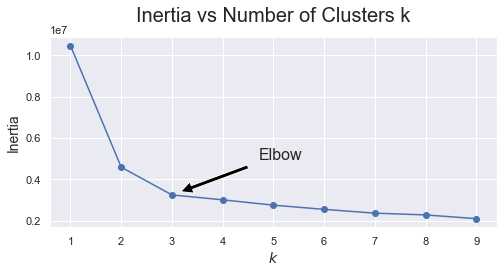

In [52]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cv_X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia vs Number of Clusters k",fontdict={'fontsize':20},pad=15 )
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

<div align="center"> Figure 1: Inertia vs. Number of Clusters with Elbow identified </div> 

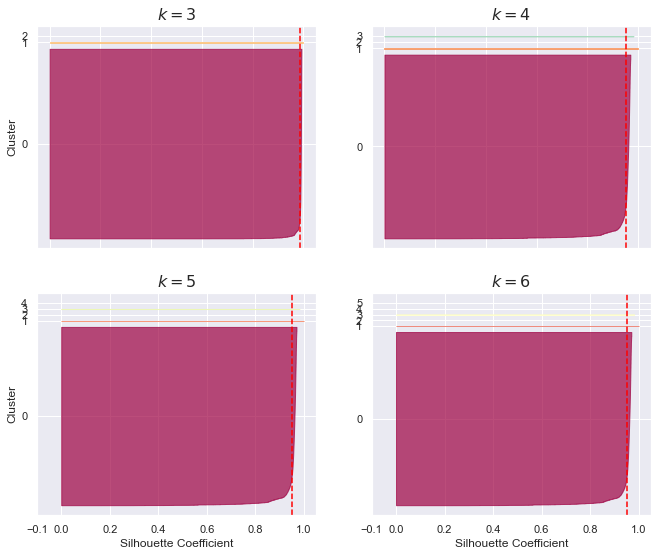

In [54]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(cv_X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

<div align="center"> Figure 2: Silhouette Diagram of Silhouette Coefficient for Clusters of 3, 4, 5, and 6 </div> 

####  Second Clustering Model: using TfidfVectorizer


To fit the clustering model, the team first created a variable called tfidf_vectorizer which was assigned to a TfidfVectorizer using the best hyperparameters from the previous GridSearch results using TfidfVectorizer and Multinomial Naive Bayes. The parameters were:
- stop_words= "english"
- ngram_range = (1,1) 
- max_features = 12000

The email raw text was fitted and transformed using the TF-IDF object. The transformed data was assigned to a variable called *X_cluster*. To select the best number for $k$, the Elbow method (Fig. 3) as well as silhouette coefficient (Fig. 4) was utilized. Inertia (within-cluster sum-of-squares) was plotted against the number of clusters. The point where average distance from the centroid suddenly falls appears to be around $k=10$. However, the elbow is not very distinct according to the Inertia vs Number of Clusters k plot.

By further plotting silhouette coefficient for the number of clusters around $k = 10$ (specifically $k = 8, 9, 10, 11$), $k = 9$ appeared to generate the highest silhouette coefficient for each group, and the size of each group was more uniform at $k = 9$. Thus, the number of clusters of 9 was chosen for KMeans.


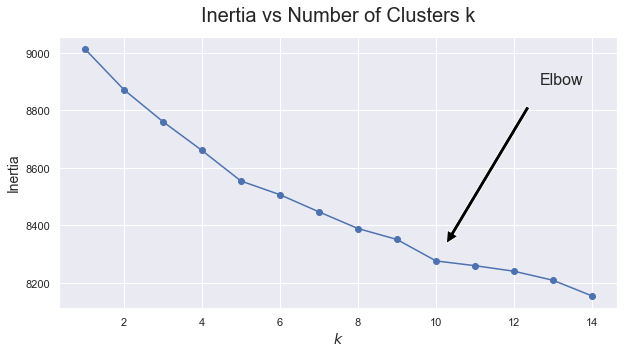

In [62]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia vs Number of Clusters k",fontdict={'fontsize':20},pad=15 )
plt.annotate('Elbow',
             xy=(10, inertias[9]),
             xytext=(0.75, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

<div align="center"> Figure 3: Inertia vs. Number of Clusters with Elbow identified </div> 

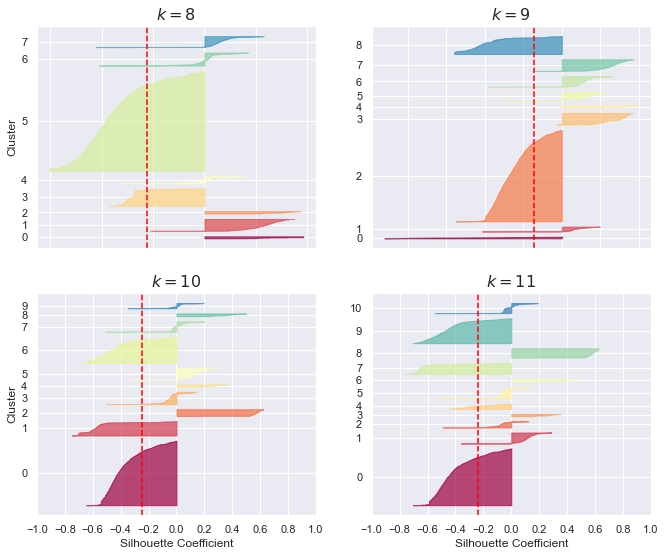

In [64]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(11, 9))

for k in (8, 9, 10, 11):
    plt.subplot(2, 2, k - 7)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(cv_X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (8, 10):
        plt.ylabel("Cluster")
    
    if k in (10, 11):
        plt.gca().set_xticks([-1, -0.8,-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

<div align="center"> Figure 4: Silhouette Diagram of Silhouette Coefficient for Clusters of 8, 9, 10, and 11 </div> 


####  Third Classification Model: MultinomialNB using TfidfVectorizer and Clustering as preprocessing

The last model created was a MultinomialNB classification model using both TfidfVectorizer and Clustering as preprocessing steps. 

The email text data was fitted and transformed to TF-IDF format using the best parameters from the classification model 1 (TfidfVectorizer) which was assigned to the *X_cluster* variable. The KMeans model was fitted using nine clusters as mentioned on top of TF-IDF results.  

The first step was to fit the KMeans model on the *X_cluster* which has been transformed to TF-IDF form using best variables identified through GridSearch. Once the KMeans were fitted, the <b>.predict</b> method was used to get the predictions on the *X_cluster* dataset. These were assigned to the *kmeans_tf_label* variable. Then each of the cluster labels was one hot encoded using the <b>get_dummies</b> method provided by the <b>Pandas</b> API. The one-hot encoded labels were assigned to the *cluster_label_dummies* variable. The <b>numpy hstack</b> method was used to merge the *cluster_label_dummies* and the *X_cluster* variables. This was assigned to the *X_train* variable, which is an inclusive dataset containing both clustering labels (one-hot encoded) and TF-IDF vectors. 

Finally, the *X_train* variable was fitted to a MultinomialNB model with the alpha of 0.1, which was the best parameter found during the previous GridSearch. 

<br>


## 3. Results  

#### Models

Table 1 shows a comparison of the three different models attempted using Multinomial Naive Bayes. TF-IDF alone, TF-IDF with K-means clustering method, and Count Vectorizer alone. It can be observed that TF-IDF and TF-IDF with clustering generated the highest overall accuracy at 99%. 

Precision for a class means among all the instances predicted by the model to be that class, how many are actually that class. Recall for a class means among all the instances that are in that class, how many can the model predict to be that class. Using the TF-IDF with clustering model as an example, precision for ham is 0.986, which means among all the emails that were predicted to be ham, 98.6% of them are actually ham. Recall for ham is 0.995, which means among all the emails that are actually ham, the model identified 99.5% of them. Precision and recall for each class under each model is also demonstrated in (Table 1).


|Model | ham precision | ham recall | spam precision | spam recall | overall accuracy |
|---|---|---|---|---|---|
|TFIDF alone| 0.985 | 0.998 | 0.994 | 0.955 | 0.99 |
|TFIDF with clustering| 0.986 | 0.995 | 0.986 | 0.958 | 0.99 |
|Count Vectorizer| 0.969 | 0.997 | 0.990 | 0.907 | 0.97 |


<div align="center"> Table 1: Overall performance for each model </div> 
<br>



The confusion matrices for TF-IDF (Fig. 5) and TF-IDF with clustering (Fig. 6) display the prediction details of each model when making predictions on the entire dataset. 

Between the two models of TF-IDF and TF-IDF with clustering, it is a trade off between whether predicting ham correctly is more important than predicting spam. If the company can tolerate a few more occasional spam emails, and they want to have as little ham emails classified as spam as possible, the TF-IDF model would be preferred. On the countrary, if the company prefers a stricter spam filter and can tolerate going into a spam folder occasionally to find an email that is ham, then the TF-IDF with Clustering model is preferred. Both models do a superb job of predicting ham or spam correctly with simple cleaning of email body information and then using Multinomial Naive Bayes on TF-IDF or TF-IDF and clustered labels with the entire email body text given as the corpus. 

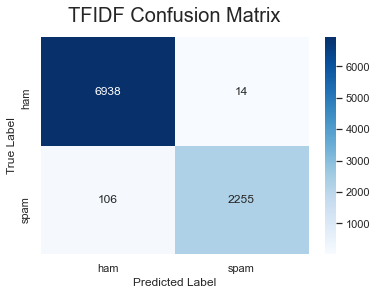

In [79]:
get_confusion_matrix(y,predict,mat_title="TFIDF Confusion Matrix")

<div align="center"> Figure 5: Confusion matrix for TFIDF </div> 

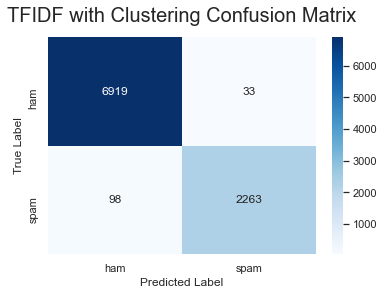

In [80]:
get_confusion_matrix(y,cluster_pred,mat_title="TFIDF with Clustering Confusion Matrix")

<div align="center"> Figure 6: Confusion matrix TFIDF with Clustering </div> 

## 4. Conclusion  

The model that uses TF-IDF alone with Naive Bayes was better at predicting ham emails correctly with some more errors on spam prediction from time to time. While the model that uses TF-IDF, clustering, and Naive Bayes was more strict in identifying spam with some more ham emails identified as spam from time to time. These two can both be recommended to an IT department to ultimately decide which model to use based on company requirements. Count Vectorizer and Naive Bayes generated a much less ideal recall score on spam prediction, meaning among all the spam emails, the model using count vectorizer could identify them correctly 90.7% of the time. This is around 5% less when compared to TF-IDF alone or TF-IDF with clustering models, so this method is not recommended to the IT department. 

It has not been investigated, but one can infer term frequency-inverse document frequency which takes in consideration of how relevant a word is to a document in a collection of documents might work better than simply counting up words that appear in each document. Certain words might appear in spam more often than ham emails, and TF-IDF is better at highlighting their relevant importance than simple counts.

Future directions of building a more robust spam filter can include adding subject field or sender's email as additional features, as well as trying various other machine learning models to keep improving precision and recall for both classes. However, the current scores for both TF-IDF and TF-IDF with clustering are already very high. Any additional improvement might be deemed trivial by an IT department. It is also worth noting the current method of using Multinomial Naive Bayes is a very fast machine learning algorithm using probabilities compared to other methods. If an IT department has many more emails to classify than the sample emails provided in this study, and the company is looking to launch this email filter very soon, Multinomial Naive Bayes, which has already generated ideal trial results, can save time and money for the company.

## Appendix - Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import email
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve, auc, roc_curve,confusion_matrix


import joblib
sns.set_theme()
# options
pd.set_option('display.max_columns', None)
# Using fixed os structure
import os
cwd = os.getcwd()
d = os.path.dirname(cwd)
d

# Notebook options
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
#pd.options.display.float_format = '{:20,.3f}'.format

In [2]:
# This code chunk go through all email file name and store the email location as well as
# its label in emails_name_label as dictionary
emails_name_label = {'email_location':[],'label':[]}
for folder in os.listdir(cwd+'/SpamAssassinMessages'):
    for root, dirs, files in os.walk(cwd+"/SpamAssassinMessages/"+folder, topdown=False):
        for name in files:
            emails_name_label['email_location'].append(os.path.join(root,name))
            if 'ham' in folder:
                emails_name_label['label'].append('ham')
            else:
                emails_name_label['label'].append('spam')
email_list = pd.DataFrame.from_dict(emails_name_label)

In [3]:
# This method uses LATIN1 encoding to read in message as email

def load_email(filename) -> email.message.Message:
    """Reads the email fine and returns an email message object"""
    with open(filename,"r",encoding='LATIN1') as f:
        return email.message_from_file(f)
    

In [4]:
# Get the email structure 
def get_email_structure(email: email.message.Message) -> str:
    """Get the structure for the email"""
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([get_email_structure(sub_email) for sub_email in payload]))
    else:
        return email.get_content_type()
    

In [5]:
# This code chunk takes 
accepted_encoding = ['windows-1252','us-ascii','iso-8859-1','koi8-r','utf-8','iso-8859-15',
                     'iso-8859-2','unknown-8bit','windows-1251','default','iso-8859-3',
                     'default_charset','windows-1256',None]
unusual_email_encoding = []
# A list of email object that in the acceptable encoding
accepted_email_list = []
accepted_email_label = []
for file_loc, label in zip(email_list['email_location'],email_list['label']):
    email_object = load_email(file_loc)
    email_language = email_object.get_content_charset()
    #if email_language in ['ks_c_5601-1987']:
    if email_language not in accepted_encoding:
        #print(get_email_structure(email_object))
        #print(email_object.get_content_charset())
        #print(email_object.get_payload()[:250])
        #print(label)
        unusual_email_encoding.append(email_language)
    else:
        accepted_email_list.append(email_object)
        accepted_email_label.append(label)

In [6]:
len(set(unusual_email_encoding))

8

In [7]:
encodings_to_delete = list(set(unusual_email_encoding))

In [8]:
def html_to_plain(email: email.message.Message) -> str:
    """Convert html_to_plain email using BeautifulSoup package"""
    try:
        soup = BeautifulSoup(email.get_payload(), 'html.parser')
        # Get Rid of lines after parsing 
        return soup.text.replace('\n','')
    except:
        return "Failed to using BeautifulSoup for html parser"

In [9]:
def email_to_plain(email: email.message.Message) -> str:
    """Convert email content into plain text"""
    struct = get_email_structure(email)
    for part in email.walk():
        partContentType = part.get_content_type()
        if partContentType not in ['text/plain','text/html']:
            continue
        try:
            partContent = part.get_payload()
        except: # in case of encoding issues
            partContent = str(part.get_payload())
        if partContentType == 'text/plain':
            return partContent
        else:
            return html_to_plain(part)

In [10]:
def get_email(file: str) -> str:
    """
    Checks email structure and chooses the best action to load it.
    If multiplart alternative the returns structure as string, if not the
    returns a string with email content.
    
    """
    try: 
        if get_email_structure(load_email(file)) == "multipart/alternative":
            return "multipart/alternative"
        else: 
            return email_to_plain(load_email(file))
    except:
        return "cant"

def clean_email(email: str, text: str) -> str:
    """Replaces selected text from email with a blank space"""
    if email is not None:
        return email.replace(text, " ")
    else:
        return email
    
def get_encoding(file: str) -> str:
    """Gets the encoding from the email object"""
    email_object = load_email(file)
    email_language = email_object.get_content_charset()
    return email_language



def find_not_valid_chars(string: str) -> str:
    """Flags strings with no valid characters"""
    #print(type(string))
    if string is not None:
        regex = r'^[\w\d_()]*$' 
        if re.match(regex,string):
            return True
        else: 
            return False
    else:
        return None

In [11]:
email_list["raw_email"] = email_list["email_location"].apply(lambda x: get_email(x) )
email_list["raw_email"] = email_list["raw_email"].apply(lambda x: clean_email(x, "\n") )
email_list["raw_email"] = email_list["raw_email"].apply(lambda x: clean_email(x, "\t") )
email_list["encoding"] = email_list["email_location"].apply(lambda x: get_encoding(x) )
email_list["not_valid"] = email_list["raw_email"].apply(lambda x: find_not_valid_chars(x) )



In [12]:
email_list.encoding.value_counts(dropna=False)

NaN                3699
us-ascii           3275
iso-8859-1         1958
windows-1252        197
iso-8859-15         104
utf-8                22
default              15
iso-8859-2           13
gb2312               11
windows-1251         11
default_charset      10
iso-2022-jp           8
ks_c_5601-1987        7
windows-1254          6
koi8-r                6
iso-8859-9            4
unknown-8bit          2
chinesebig5           1
windows-1256          1
gb2312_charset        1
iso-8859-3            1
euc-kr                1
Name: encoding, dtype: int64

In [13]:
email_list[email_list['encoding']=="windows-1254"]

,email_location,label,raw_email,encoding,not_valid
330,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3C!DOCTYPE HTML PUBLIC =22-=2F=2FW3C=2F=2FDTD...,windows-1254,False
438,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3C!DOCTYPE HTML PUBLIC =22-=2F=2FW3C=2F=2FDTD...,windows-1254,False
582,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3C!DOCTYPE HTML PUBLIC =22-=2F=2FW3C=2F=2FDTD...,windows-1254,False
981,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3C!DOCTYPE HTML PUBLIC =22-=2F=2FW3C=2F=2FDTD...,windows-1254,False
2300,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3Chtml=3E=3Chead=3E=3Cmeta http-equiv=3DConte...,windows-1254,False
2591,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,=3Chtml=3E=3Chead=3E=3Cmeta http-equiv=3DConte...,windows-1254,False


In [14]:
email_list = email_list[~email_list.encoding.isin(encodings_to_delete)]

In [15]:
email_list.encoding.value_counts(dropna=False)

NaN                3699
us-ascii           3275
iso-8859-1         1958
windows-1252        197
iso-8859-15         104
utf-8                22
default              15
iso-8859-2           13
windows-1251         11
default_charset      10
koi8-r                6
unknown-8bit          2
iso-8859-3            1
windows-1256          1
Name: encoding, dtype: int64

In [16]:
email_list.shape

(9314, 5)

In [17]:
email_list[email_list['encoding'].isnull()].head(20)

,email_location,label,raw_email,encoding,not_valid
1,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,"Friend,Now you can copy DVD's and Games http:/...",None,False
2,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Pocket the newest 8 year annuity! Pocket the...,None,False
5,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,CONSANTLY beingbombarded by so-called FREE m...,None,False
6,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,We dare you... Try to find a better annuity!...,None,False
10,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,An Additional Income Stream from your curren...,None,False
12,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,SGVyZSdzIHRoZSBob3R0ZXN0IHRoaW5nIGluIERWRHMuI...,None,False
14,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Protect your financial well-being. Purchase an...,None,False
18,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Click Here Now !Simply AmateurJust like the gi...,None,False
19,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Answer-Us Unlist Information This message is...,None,False
23,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Never Pay Retail!Direct Synergy - Household Cr...,None,False


In [18]:
email_list.iloc[51].raw_email

'_/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/   S   P   E   C   I   A   L         R   E   P   O   R   T    How To Reliably Generate Hundreds Of Leads And Prospects Every Week!                 _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/ _/         Our research has found that many online entrepreneurs have tried one or more of the following...      Free Classifieds? (Don\'t work anymore)     Web Site? (Takes thousands of surfers)     Banners? (Expensive and losing their punch)     E-Zine? (Hope they have a -huge- subscriber list)     Search Engines? (Forget it, unless you\'re in the top 10)              S O   W H A T   D O E S   W O R K ?  Although often misunderstood, there is one method that has proven to succeed time-after-time.            E - M A I L   M A R K E T I N G ! !   Does the thought of $50,000 to $151,200.00 per year make you tingle with excitement?  Many of our customers make that and  more... Click here to find out how:  <a href="http://32.97.1

In [19]:
email_list[email_list.index==51]

,email_location,label,raw_email,encoding,not_valid
51,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,FREE CD-ROM LESSONS http://isis.webstakes.com...,None,False


In [20]:
find_not_valid_chars(email_list.iloc[1524].raw_email)

False

In [21]:
cant_read = []
for i in range(0,email_list.shape[0]):
    try :
        v = find_not_valid_chars(email_list.iloc[i].raw_email)
        if not isinstance(v, bool):
            cant_read.append(i)
            print(i)
            #print(response)
            #print("-"*20)
    except:
        print(i)

1498


In [22]:
cant_read

[1498]

In [23]:
email_list.not_valid.value_counts(dropna=False)

False    9306
True        7
NaN         1
Name: not_valid, dtype: int64

In [24]:
email_list[email_list["not_valid"]==True]

,email_location,label,raw_email,encoding,not_valid
13,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,iso-8859-1,True
78,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,iso-8859-1,True
282,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,None,True
726,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,None,True
1543,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,None,True
1861,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,4623,iso-8859-1,True
2056,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,,None,True


In [25]:
email_list[email_list["raw_email"]=="multipart/alternative"]

,email_location,label,raw_email,encoding,not_valid
460,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,multipart/alternative,None,False
793,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,multipart/alternative,None,False
2543,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,multipart/alternative,None,False


In [26]:
email_list[email_list["raw_email"]=="cant"]

,email_location,label,raw_email,encoding,not_valid


In [27]:
email_list[email_list['raw_email'].isnull()]

,email_location,label,raw_email,encoding,not_valid
1524,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,None,None,None


In [28]:
email_list.iloc[1560,2]

"DC MOTOR,  GEAR MOTOR. New Offer 2002                For customer's  O.E.M  are most welcomed=20 If special requested RPM, length of shaft, torque, size, voltage, etc. = Please contact us=20  E-mail:   motorvan@sinaman.com                Please contact with Mr. = Van Lee        NO: HL101-D-D8xH6 VIBRATOR MOTOR  SIZE:  20 x 15.5 x H25 MM =20       PRICE:  US$ 0.12/PC      NO:HL307 DC MOTOR=20       SIZE: D12 x 19.5 MM                       PRICE: US$ 0.38/PC =20       NO: HL1011-DC  MOTOR FOR WHEELCHAIR, SCOOTER=20       SIZE: D100 x H70 MM       OUTPUT: 95 W                       PRICE: US$ 13.50/PC=20      NO: HL200 GENERATOR MOTOR=20       SIZE: D30.5 x H13 MM       PRICE: US$ 2.3     =20       WE PRODUCE MORE THAN 70 DIFFERENT DESIGN AND=20       SIZE OF  DC, GEAR AND AC MOTORS, THEY ARE SUITABLE =20        FOR OPERATION TOYS, HOUSEHOLD APPLIANCES, RECORDS,=20        SCOOTER, VIBRATOR, GENERATOR, WHEELCHAIR ETC.        -----ANY ENQUIRY ARE WELCOME-----        Hing Lung Motor Mfy,  

In [29]:
email_list.head()

,email_location,label,raw_email,encoding,not_valid
0,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,"Dear Homeowner, Interest Rates are at their ...",windows-1252,False
1,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,"Friend,Now you can copy DVD's and Games http:/...",None,False
2,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Pocket the newest 8 year annuity! Pocket the...,None,False
3,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,Congratulations! You Get a Free Handheld Organ...,us-ascii,False
4,/Users/mingyang/Desktop/SMU/QTW/casestudy3/Spa...,spam,ATTENTION: This is a MUST for ALL Computer Use...,windows-1252,False


In [30]:
# delete index 1524
email_list.drop([1524], inplace=True)

### Classification - TFIDF

In [31]:
def cv_common(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Selects only selected columns from the given dataframe.
    Also resets index for number of compunations
    """
    cv_result_summary = df[columns]
    cv_result_summary.index  = np.arange(1,len(cv_result_summary)+1)
    cv_result_summary = cv_result_summary.reset_index()
    return cv_result_summary

def cv_summary(estimator: GridSearchCV, columns: list) -> pd.DataFrame: 
    """
    Creates a dataframe from the estimator CV results
    """
    df = pd.DataFrame(estimator.cv_results_)
    cv_result_summary = cv_common(df, columns)
    cv_result_summary = cv_result_summary.rename(columns = {
        "index": "param_combination"
    })
    return cv_result_summary

def get_acc_score(model, x, y):
    """
    Calculates socre from estimator (gridsearch) inherit scorer 
    """
    return model.score(x, y)


def get_confusion_matrix(y, yhat,mat_title="Confusion Matrix"):
    x_axis_labels = ['ham','spam']
    y_axis_labels = ['ham','spam']
    cm_n = confusion_matrix(y, yhat)
    ax = sns.heatmap(cm_n,cmap='Blues',annot=True,fmt='2d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    ax.set_title(mat_title,fontdict={'fontsize':20},pad=15)

def get_classification_report(x_train, y_train, x_test, y_test, pred, model):
    """
    This function is used to get comprehensive classification report for binary response:
    Training Accuracy, Test Accuracy, print classification_report, plot confusion matrix.
    """
    print(f"Training Score: {get_acc_score(model, x_train, y_train):,.5f}")
    print("Classification Report:")
    print(classification_report(y_test,pred))
    get_confusion_matrix(y_test,pred)

    

In [32]:
X = email_list.raw_email
y = email_list.label 

In [33]:
X[8943]

"Kenn Humborg wrote: >>Cheers All for your words of wisdom. >> >>I came across this which has worked a treat:- >> >>http://www.avdf.com/mar97/art_autorun.html >  >  > (This is all Windows-related autorun stuff).  Which was obvious since he mentioned: `start file.html` And the reason I didn't reply, Doh!  Pádraig.   --  Irish Linux Users' Group: ilug@linux.ie http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information. List maintainer: listmaster@linux.ie  "

In [34]:
y[8943]

'ham'

In [35]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

grid = [{
    "tfidf__max_features": [8000, 10000, 12000],
    "tfidf__ngram_range": [(1,1),(1,2),(1,3), (2,2), (3,3), (2,3)],
    "model__alpha": [0.1, 0.5, 1]
    
}]

model = MultinomialNB(alpha=1)

pipeline = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words="english", ngram_range = (1,3))),
    ('model', model)])

clf_search = GridSearchCV(pipeline, grid, scoring='roc_auc', cv = cv,n_jobs=-2, verbose=15, return_train_score=True  )

In [36]:
%%time
#search_clf = clf_search.fit(X, y)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs


In [37]:
file_name = f"{cwd}/tfidf_classification_m1.sav"
#joblib.dump(search_clf,file_name)
search_clf = joblib.load(file_name)


In [38]:
type(search_clf)

sklearn.model_selection._search.GridSearchCV

In [39]:
#search_clf.cv_results_

In [40]:
search_columns = ["param_tfidf__max_features", "param_tfidf__ngram_range" , "param_model__alpha" ,"mean_train_score", "mean_test_score","mean_fit_time","rank_test_score"]
df_search_result = cv_summary(search_clf,search_columns)
df_search_result

,param_combination,param_tfidf__max_features,param_tfidf__ngram_range,param_model__alpha,mean_train_score,mean_test_score,mean_fit_time,rank_test_score
0,1,8000,"(1, 1)",0.1,0.999382,0.998729,3.039519,4
1,2,8000,"(1, 2)",0.1,0.998948,0.998279,8.319596,8
2,3,8000,"(1, 3)",0.1,0.998492,0.997626,14.689524,14
3,4,8000,"(2, 2)",0.1,0.998063,0.996905,6.540518,25
4,5,8000,"(3, 3)",0.1,0.988855,0.985577,7.350119,48
5,6,8000,"(2, 3)",0.1,0.996626,0.995078,13.036919,36
6,7,10000,"(1, 1)",0.1,0.999493,0.998903,3.479531,2
7,8,10000,"(1, 2)",0.1,0.999199,0.998582,8.756627,5
8,9,10000,"(1, 3)",0.1,0.998910,0.998282,15.151999,7
9,10,10000,"(2, 2)",0.1,0.998413,0.997321,6.962377,22


In [41]:
vocab = pd.DataFrame.from_dict(search_clf.best_estimator_.named_steps["tfidf"].vocabulary_, orient='index',).reset_index()
vocab = vocab.rename(columns={"index": "token", 0: "index"})


Training Score: 0.99957
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      6952
        spam       0.99      0.96      0.97      2361

    accuracy                           0.99      9313
   macro avg       0.99      0.98      0.98      9313
weighted avg       0.99      0.99      0.99      9313



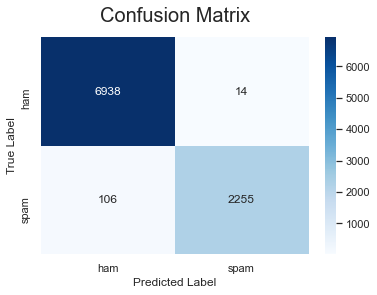

In [42]:
predict = search_clf.predict(X)
get_classification_report(X,y,X,y,predict,search_clf)

In [43]:
vocab.sort_values("index").head()

,token,index
503,00,0
429,000,1
10226,0000,2
10009,000000,3
8801,0000015,4


In [44]:
feature_idf = pd.DataFrame.from_dict(dict(zip(search_clf.best_estimator_.named_steps["tfidf"].get_feature_names(), search_clf.best_estimator_.named_steps["tfidf"].idf_)), orient="index").reset_index()
feature_idf = feature_idf.rename(columns={"index": "Token", 0:"idf"}).reset_index()




In [45]:
feature_idf.head()

,index,Token,idf
0,0,00,2.770304
1,1,000,3.367338
2,2,0000,5.980391
3,3,000000,6.378074
4,4,0000015,9.040662


### Classification - CountVectorizer

In [46]:
# Create tuning grid for CountVectorizer
grid_cv = [{
    "cv__max_features": [8000, 10000, 12000],
    "cv__ngram_range": [(1,1),(1,2),(1,3), (2,2), (3,3), (2,3)],
    "model__alpha": [0.1, 0.5, 1]
    
}]

model = MultinomialNB(alpha=1)

cv_pipeline = Pipeline(steps=[
    ('cv', CountVectorizer(stop_words="english", ngram_range = (1,3), max_features = 10000)),
    ('model', model)])

clf_cv_search = GridSearchCV(cv_pipeline, grid_cv, scoring='roc_auc', cv = cv,n_jobs=-2, verbose=15, return_train_score=True )

In [47]:
%%time
#search_cv_clf = clf_cv_search.fit(X, y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [48]:
# Save model running result
file_name_cv = f"{cwd}/count_vectorizer_M1.sav"
#joblib.dump(search_cv_clf,file_name_cv)
search_cv_clf = joblib.load(file_name_cv)

In [49]:
search_cv_columns = ["param_cv__max_features", "param_cv__ngram_range" , "param_model__alpha" ,"mean_train_score", "mean_test_score","mean_fit_time","rank_test_score"]
df_cv_search_result = cv_summary(search_cv_clf,search_cv_columns)
df_cv_search_result

,param_combination,param_cv__max_features,param_cv__ngram_range,param_model__alpha,mean_train_score,mean_test_score,mean_fit_time,rank_test_score
0,1,8000,"(1, 1)",0.1,0.997473,0.993652,3.350968,34
1,2,8000,"(1, 1)",0.5,0.997126,0.993336,3.676781,38
2,3,8000,"(1, 1)",1,0.996959,0.993005,4.000384,40
3,4,8000,"(1, 2)",0.1,0.997944,0.995155,9.852231,17
4,5,8000,"(1, 2)",0.5,0.997704,0.994684,9.772248,23
5,6,8000,"(1, 2)",1,0.997530,0.994387,9.956829,26
6,7,8000,"(1, 3)",0.1,0.997695,0.994917,18.316540,21
7,8,8000,"(1, 3)",0.5,0.997392,0.994483,18.636695,25
8,9,8000,"(1, 3)",1,0.997197,0.994225,18.668100,28
9,10,8000,"(2, 2)",0.1,0.997464,0.995644,8.732738,10


Training Score: 0.99831
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      6952
        spam       0.99      0.91      0.95      2361

    accuracy                           0.97      9313
   macro avg       0.98      0.95      0.96      9313
weighted avg       0.97      0.97      0.97      9313



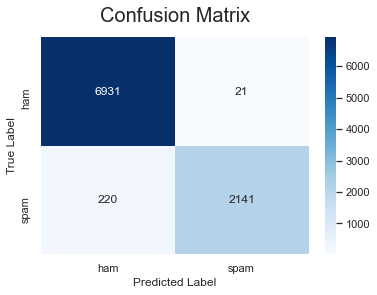

In [50]:
cv_predict = search_cv_clf.predict(X)
get_classification_report(X,y,X,y,cv_predict,search_cv_clf)

### Clustering - CountVectorizer

In [51]:
countVec = CountVectorizer(stop_words="english", ngram_range = (2,2), max_features = 12000)
cv_X = countVec.fit_transform(X)

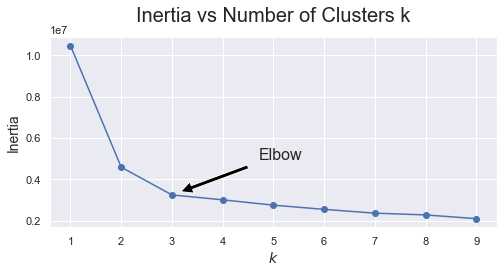

In [52]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cv_X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia vs Number of Clusters k",fontdict={'fontsize':20},pad=15 )
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [53]:
silhouette_scores = [silhouette_score(cv_X, model.labels_)
                     for model in kmeans_per_k[1:]]

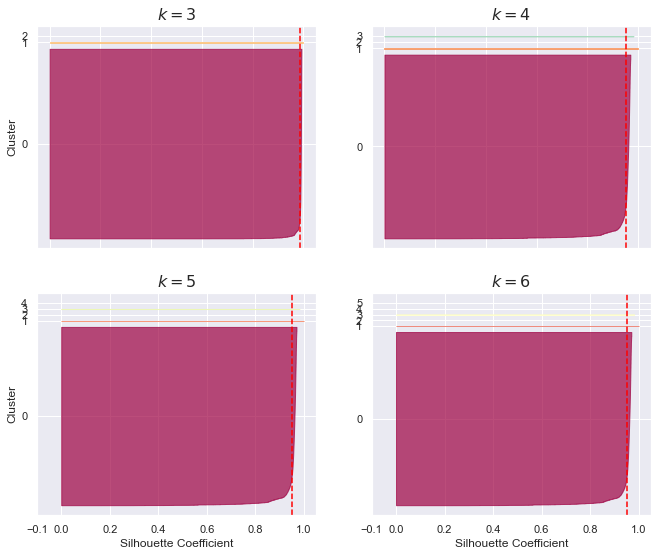

In [54]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(cv_X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Based on above number of k analysis, elbow method seems more informative. k=3 seems to worth trying.

However based on the clustering labels shown, it doesn't seem to provide added benefits for clustering using CountVectorizer

In [55]:
kmeans_label = KMeans(n_clusters=3, random_state=42).fit_predict(cv_X)

In [56]:
pd.Series(kmeans_label).value_counts()

0    9310
1       2
2       1
dtype: int64

### Clustering - TFIDF

In [57]:
# X = email_list.raw_email
# y = email_list.label 

In [58]:
# Use best features selected by gridsearch
tfidf_vectorizer = TfidfVectorizer(stop_words="english", ngram_range = (1,1),max_features=12000)
X_cluster = tfidf_vectorizer.fit_transform(email_list.raw_email)

In [59]:
feature_idf_cluster = pd.DataFrame.from_dict(dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_)), orient="index").reset_index()
feature_idf_cluster = feature_idf_cluster.rename(columns={"index": "Token", 0:"idf"}).reset_index()


In [60]:
feature_idf_cluster.head()

,index,Token,idf
0,0,00,2.770304
1,1,000,3.367338
2,2,0000,5.980391
3,3,000000,6.378074
4,4,0000015,9.040662


In [61]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_cluster) for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

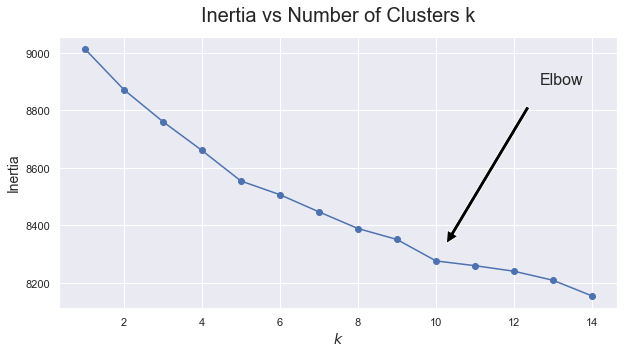

In [62]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia vs Number of Clusters k",fontdict={'fontsize':20},pad=15 )
plt.annotate('Elbow',
             xy=(10, inertias[9]),
             xytext=(0.75, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [63]:
silhouette_scores = [silhouette_score(cv_X, model.labels_)
                     for model in kmeans_per_k[1:]]

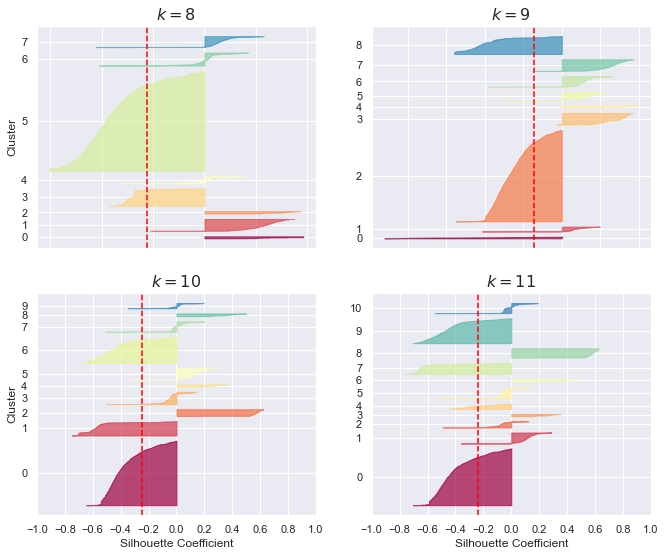

In [64]:
# Code adapted from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
# Github Link: https://github.com/ageron/handson-ml2

plt.figure(figsize=(11, 9))

for k in (8, 9, 10, 11):
    plt.subplot(2, 2, k - 7)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(cv_X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (8, 10):
        plt.ylabel("Cluster")
    
    if k in (10, 11):
        plt.gca().set_xticks([-1, -0.8,-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

k around 10 seem to be what's identified by elbow method with inertia, but exploring further at k=9 seems to be generating best results of Silhouette score for all classes.

In [65]:
kmeans_tf = KMeans(n_clusters=9, random_state=42).fit(X_cluster)
kmeans_tf_transform = kmeans_tf.transform(X_cluster)
kmeans_tf_label = kmeans_tf.predict(X_cluster)

In [66]:
pd.Series(kmeans_tf_label).value_counts()

2    5334
8    1040
3     677
7     675
6     620
5     464
1     279
4     131
0      93
dtype: int64

In [67]:
kmeans_tf_label

array([2, 2, 2, ..., 6, 6, 2], dtype=int32)

In [68]:
kmeans_tf_transform[0,:]

array([1.14029547, 1.15366353, 0.98345617, 1.07559584, 1.27833987,
       1.09660326, 1.10084031, 1.07685454, 1.00943011])

In [69]:
X_cluster.shape

(9313, 12000)

In [70]:
cluster_label_dummies = pd.get_dummies(kmeans_tf_label)

In [71]:
cluster_label_dummies.values

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [72]:
# Merge TFIDF result with 10 cluster labels
X_train = hstack((cluster_label_dummies.values,X_cluster))

In [73]:
X_train.shape

(9313, 12009)

In [74]:
# Set new_model with best discovered alpha value under TFIDF gridsearch
new_model = model.set_params(alpha=0.1)

In [75]:
new_model.fit(X_train, y)

MultinomialNB(alpha=0.1)

Training Score: 0.98593
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      6952
        spam       0.99      0.96      0.97      2361

    accuracy                           0.99      9313
   macro avg       0.99      0.98      0.98      9313
weighted avg       0.99      0.99      0.99      9313



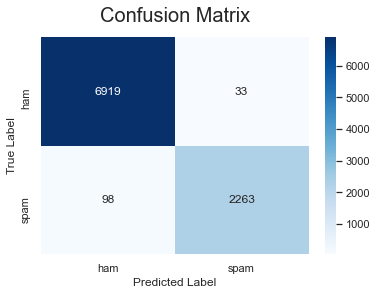

In [76]:
cluster_pred = new_model.predict(X_train)
get_classification_report(X_train, y, X_train, y, cluster_pred, new_model)